In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1.2, style='darkgrid')  # 解决Seaborn中文显示问题
palette = 'deep'


In [2]:
# df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df = pd.read_excel('均值填充-物流网络历史货量数据.xlsx')
df

,场地1,场地2,2021-01-01 00:00:00,2021-01-02 00:00:00,2021-01-03 00:00:00,2021-01-04 00:00:00,2021-01-05 00:00:00,2021-01-06 00:00:00,2021-01-07 00:00:00,2021-01-08 00:00:00,...,2022-12-22 00:00:00,2022-12-23 00:00:00,2022-12-24 00:00:00,2022-12-25 00:00:00,2022-12-26 00:00:00,2022-12-27 00:00:00,2022-12-28 00:00:00,2022-12-29 00:00:00,2022-12-30 00:00:00,2022-12-31 00:00:00
0,DC1,DC8,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,DC10,DC12,306,328,163,193,565,964,623,284,...,320,320,320,320,320,320,320,320,320,320
2,DC10,DC13,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,DC10,DC14,2613,2941,5968,4459,7646,5106,7155,5939,...,8663,9818,12248,13255,9896,15492,8230,29021,9991,13254
4,DC10,DC17,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,DC9,DC58,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1045,DC9,DC62,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1046,DC9,DC67,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
1047,DC9,DC79,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [4]:
# 宽表转长表
df = pd.melt(df, id_vars=['场地1', '场地2'], var_name='日期', value_name='货量')
df

,场地1,场地2,日期,货量
0,DC1,DC8,2021-01-01,3
1,DC10,DC12,2021-01-01,306
2,DC10,DC13,2021-01-01,3
3,DC10,DC14,2021-01-01,2613
4,DC10,DC17,2021-01-01,2
...,...,...,...,...
765765,DC9,DC58,2022-12-31,1
765766,DC9,DC62,2022-12-31,2
765767,DC9,DC67,2022-12-31,44
765768,DC9,DC79,2022-12-31,2


In [5]:
# 添加年份列
ddf = df.copy()
ddf['年份'] = ddf['日期'].dt.year
ddf['月日'] = df['日期'].dt.strftime('%m-%d')
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC1,DC8,2021-01-01,3,2021,01-01
1,DC10,DC12,2021-01-01,306,2021,01-01
2,DC10,DC13,2021-01-01,3,2021,01-01
3,DC10,DC14,2021-01-01,2613,2021,01-01
4,DC10,DC17,2021-01-01,2,2021,01-01
...,...,...,...,...,...,...
765765,DC9,DC58,2022-12-31,1,2022,12-31
765766,DC9,DC62,2022-12-31,2,2022,12-31
765767,DC9,DC67,2022-12-31,44,2022,12-31
765768,DC9,DC79,2022-12-31,2,2022,12-31


In [6]:
','.join(ddf.columns.values.tolist())

'场地1,场地2,日期,货量,年份,月日'

In [7]:
# 按月日排序
ddf.sort_values(by='月日').reset_index(drop=True, inplace=True)
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC1,DC8,2021-01-01,3,2021,01-01
1,DC10,DC12,2021-01-01,306,2021,01-01
2,DC10,DC13,2021-01-01,3,2021,01-01
3,DC10,DC14,2021-01-01,2613,2021,01-01
4,DC10,DC17,2021-01-01,2,2021,01-01
...,...,...,...,...,...,...
765765,DC9,DC58,2022-12-31,1,2022,12-31
765766,DC9,DC62,2022-12-31,2,2022,12-31
765767,DC9,DC67,2022-12-31,44,2022,12-31
765768,DC9,DC79,2022-12-31,2,2022,12-31


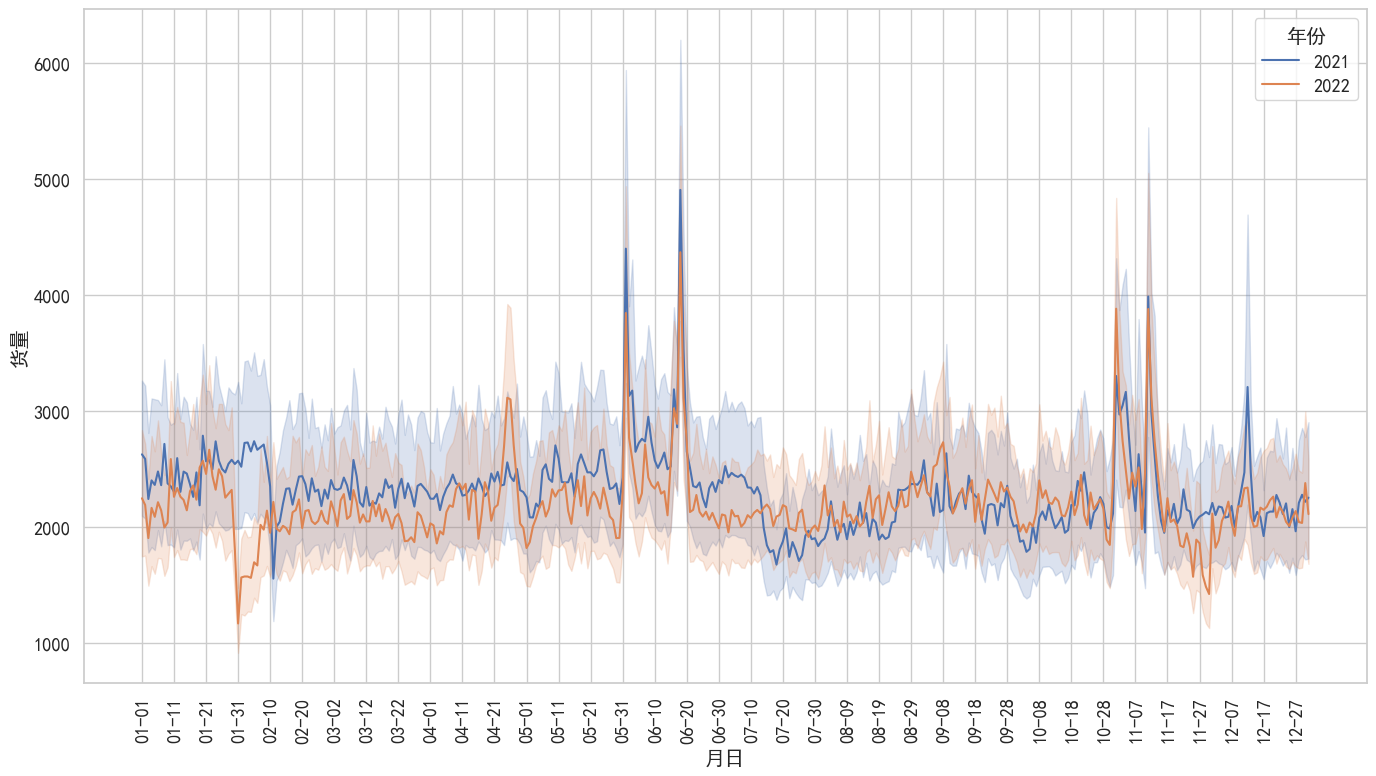

In [8]:
# 以年份为类目，按月份，全路线货量-置信区间折线图
# for style in ['darkgrid', 'whitegrid', 'white', 'dark']:
style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(ddf, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(ddf['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，全路线货量-置信区间折线图-{style}.svg')
plt.show()

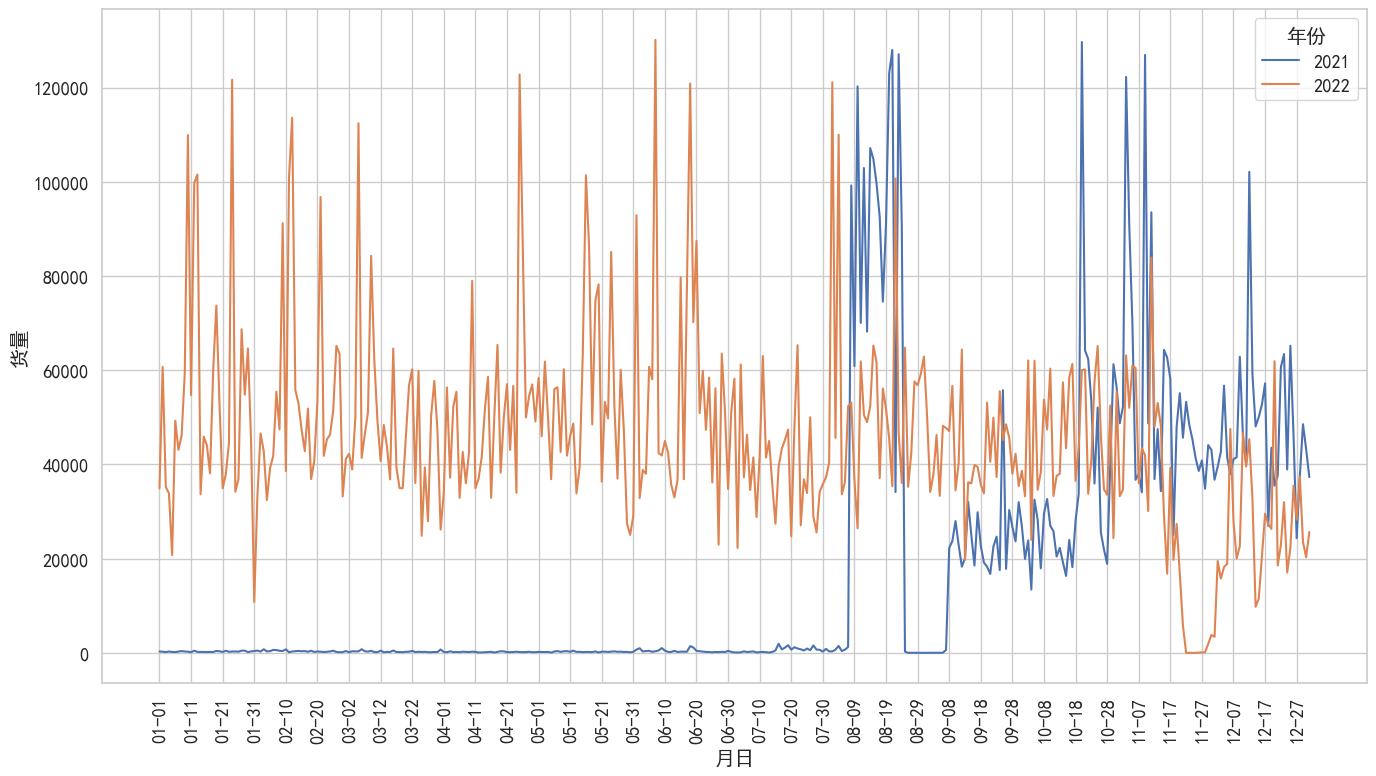

In [116]:
# 以年份为类目，按月份，DC14→DC10 货量-折线图
data = ddf[(ddf['场地1'] == 'DC14') & (ddf['场地2'] == 'DC10')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC14→DC10 货量-折线图-{style}.svg')
plt.show()

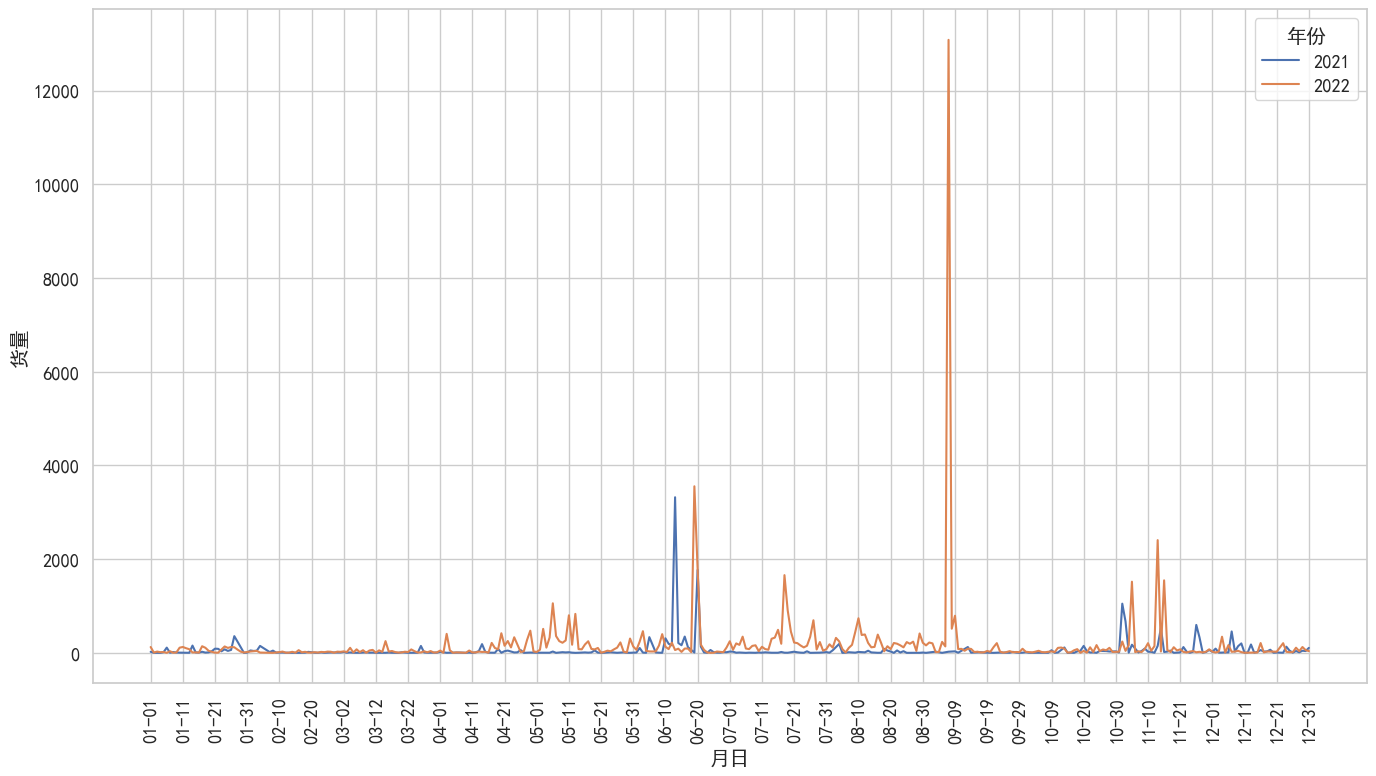

In [117]:
# 以年份为类目，按月份，DC20→DC35 货量-折线图
data = ddf[(ddf['场地1'] == 'DC20') & (ddf['场地2'] == 'DC35')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC20→DC35 货量-折线图-{style}.svg')
plt.show()

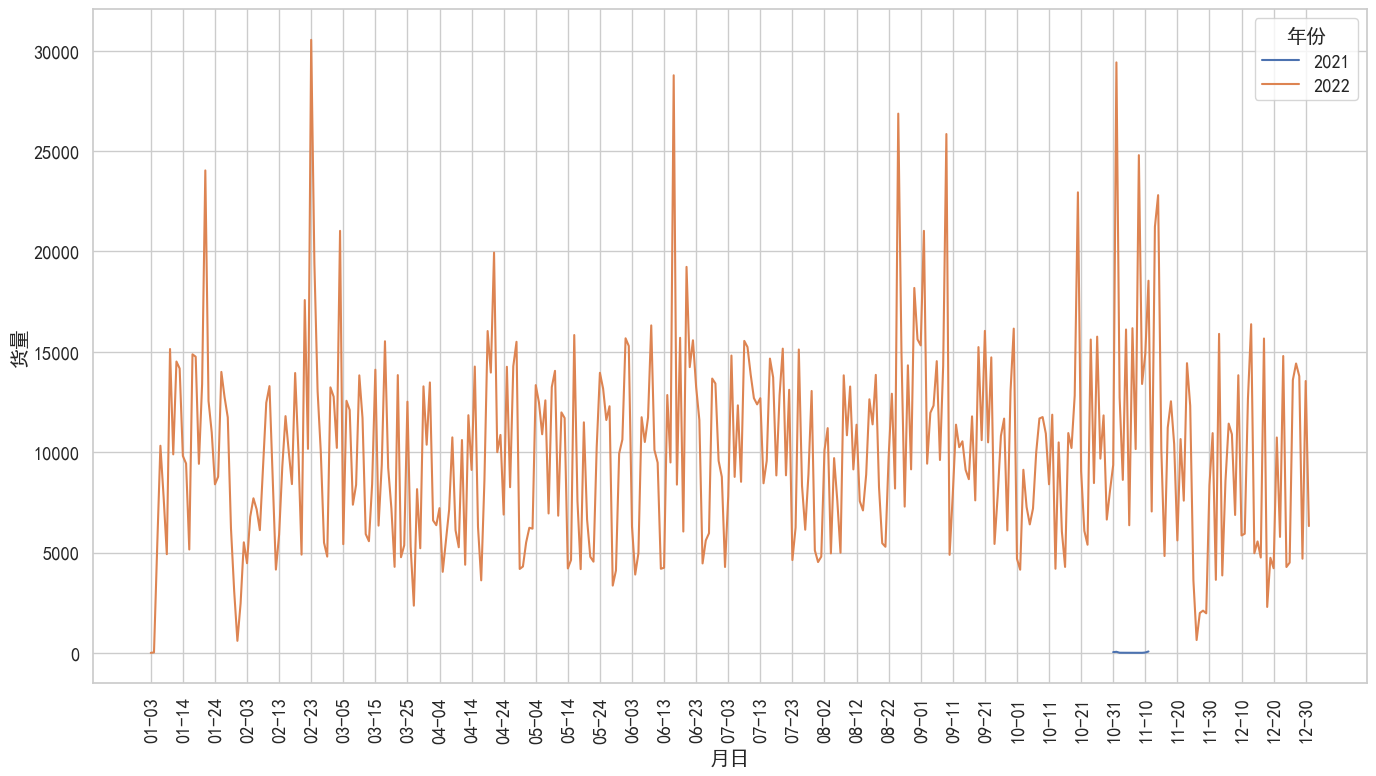

In [118]:
# 以年份为类目，按月份，DC25→DC62 货量-折线图
data = ddf[(ddf['场地1'] == 'DC25') & (ddf['场地2'] == 'DC62')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC25→DC62 货量-折线图-{style}.svg')
plt.show()